In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

#Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


622

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | haines junction
Processing Record 3 of Set 1 | cayenne
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | sawtell
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | sao jose da coroa grande
Processing Record 12 of Set 1 | port blair
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | baracoa
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | north platte
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | kanbe
Processing Record 22 of Set 1 | bey

Processing Record 39 of Set 4 | timmins
Processing Record 40 of Set 4 | mendi
Processing Record 41 of Set 4 | shirokiy
Processing Record 42 of Set 4 | kalmunai
Processing Record 43 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 44 of Set 4 | namatanai
Processing Record 45 of Set 4 | rodrigues alves
Processing Record 46 of Set 4 | constitucion
Processing Record 47 of Set 4 | torbay
Processing Record 48 of Set 4 | wanaka
Processing Record 49 of Set 4 | saint-augustin
Processing Record 50 of Set 4 | victoria
Processing Record 1 of Set 5 | klaksvik
Processing Record 2 of Set 5 | bua yai
Processing Record 3 of Set 5 | carbonia
Processing Record 4 of Set 5 | fuerte olimpo
Processing Record 5 of Set 5 | belmonte
Processing Record 6 of Set 5 | bethel
Processing Record 7 of Set 5 | ulundi
Processing Record 8 of Set 5 | lesnoy
Processing Record 9 of Set 5 | hobyo
Processing Record 10 of Set 5 | tazovskiy
Processing Record 11 of Set 5 | jiaonan
Processing Record 12 of Set 5 

Processing Record 29 of Set 8 | jiangyan
Processing Record 30 of Set 8 | longyearbyen
Processing Record 31 of Set 8 | kavaratti
Processing Record 32 of Set 8 | fort frances
Processing Record 33 of Set 8 | sao filipe
Processing Record 34 of Set 8 | port hedland
Processing Record 35 of Set 8 | khorixas
Processing Record 36 of Set 8 | otofuke
Processing Record 37 of Set 8 | kenora
Processing Record 38 of Set 8 | buta
Processing Record 39 of Set 8 | vagur
Processing Record 40 of Set 8 | sinkat
City not found. Skipping...
Processing Record 41 of Set 8 | herat
Processing Record 42 of Set 8 | samarai
Processing Record 43 of Set 8 | acapulco
Processing Record 44 of Set 8 | deloraine
Processing Record 45 of Set 8 | ahuimanu
Processing Record 46 of Set 8 | galgani
City not found. Skipping...
Processing Record 47 of Set 8 | turka
Processing Record 48 of Set 8 | kirkwall
Processing Record 49 of Set 8 | carroll
Processing Record 50 of Set 8 | salalah
Processing Record 1 of Set 9 | chapais
Processin

Processing Record 14 of Set 12 | bilma
Processing Record 15 of Set 12 | abu samrah
Processing Record 16 of Set 12 | kulhudhuffushi
Processing Record 17 of Set 12 | petatlan
Processing Record 18 of Set 12 | manokwari
Processing Record 19 of Set 12 | kochkurovo
Processing Record 20 of Set 12 | hirado
Processing Record 21 of Set 12 | sarab
Processing Record 22 of Set 12 | seymchan
Processing Record 23 of Set 12 | scarborough
Processing Record 24 of Set 12 | ibanesti
Processing Record 25 of Set 12 | turayf
Processing Record 26 of Set 12 | namtsy
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | pimentel
Processing Record 29 of Set 12 | mitsamiouli
Processing Record 30 of Set 12 | kishapu
Processing Record 31 of Set 12 | san juan
Processing Record 32 of Set 12 | lalpur
Processing Record 33 of Set 12 | te anau
Processing Record 34 of Set 12 | kendari
Processing Record 35 of Set 12 | vyshneve
Processing Record 36 of Set 12 | lisakovsk
Processing Record 37 of Set 12 | 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kruisfontein,-34.0033,24.7314,63.88,83,29,5.44,ZA,2022-01-28 22:56:44
1,Haines Junction,60.7522,-137.5108,30.15,69,100,4.61,CA,2022-01-28 22:56:44
2,Cayenne,4.9333,-52.3333,75.24,90,100,9.22,GF,2022-01-28 22:56:45
3,New Norfolk,-42.7826,147.0587,65.91,60,98,3.00,AU,2022-01-28 22:56:45
4,Sawtell,-30.3833,153.1000,75.52,90,100,8.05,AU,2022-01-28 22:56:45
5,Mataura,-46.1927,168.8643,71.31,35,96,4.99,NZ,2022-01-28 22:56:10
6,Hobart,-42.8794,147.3294,66.27,78,75,1.01,AU,2022-01-28 22:56:12
7,College,64.8569,-147.8028,3.18,55,75,6.91,US,2022-01-28 22:56:46
8,Tiksi,71.6872,128.8694,-7.29,99,97,7.90,RU,2022-01-28 22:56:46
9,Atuona,-9.8000,-139.0333,77.81,71,9,14.16,PF,2022-01-28 22:56:46


In [151]:
# new_column_order = ["City", "Country", "Data", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[ ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kruisfontein,ZA,2022-01-28 22:56:44,-34.0033,24.7314,63.88,83,29,5.44
1,Haines Junction,CA,2022-01-28 22:56:44,60.7522,-137.5108,30.15,69,100,4.61
2,Cayenne,GF,2022-01-28 22:56:45,4.9333,-52.3333,75.24,90,100,9.22
3,New Norfolk,AU,2022-01-28 22:56:45,-42.7826,147.0587,65.91,60,98,3.00
4,Sawtell,AU,2022-01-28 22:56:45,-30.3833,153.1000,75.52,90,100,8.05
5,Mataura,NZ,2022-01-28 22:56:10,-46.1927,168.8643,71.31,35,96,4.99
6,Hobart,AU,2022-01-28 22:56:12,-42.8794,147.3294,66.27,78,75,1.01
7,College,US,2022-01-28 22:56:46,64.8569,-147.8028,3.18,55,75,6.91
8,Tiksi,RU,2022-01-28 22:56:46,71.6872,128.8694,-7.29,99,97,7.90
9,Atuona,PF,2022-01-28 22:56:46,-9.8000,-139.0333,77.81,71,9,14.16


In [152]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [153]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


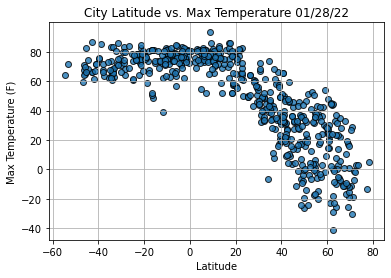

In [140]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


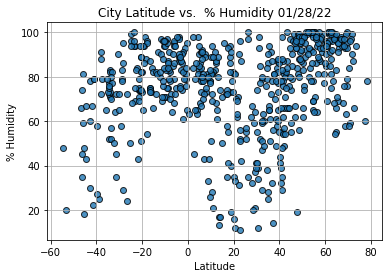

In [141]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.  % Humidity "+ time.strftime("%x"))
plt.ylabel("% Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


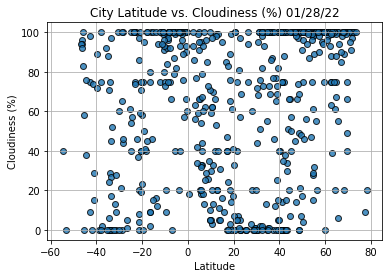

In [142]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()


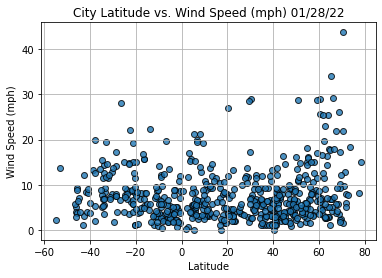

In [143]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


In [144]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [145]:
index13 = city_data_df.loc[13]
index13


City                         Hilo
Country                        US
Date          2022-01-28 22:56:47
Lat                       19.7297
Lng                       -155.09
Max Temp                    79.25
Humidity                       82
Cloudiness                     17
Wind Speed                   8.01
Name: 13, dtype: object

In [146]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


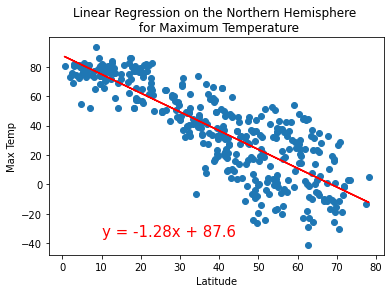

In [147]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Max Temp", (10,-35))


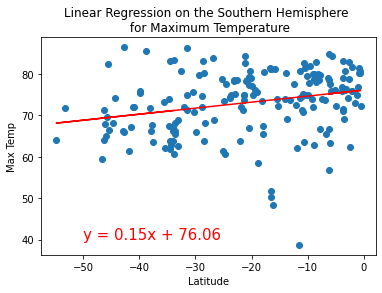

In [148]:
# Linear regression on theSouthern Hemisphere
x_values =southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 
                       "Max Temp", (-50,40))


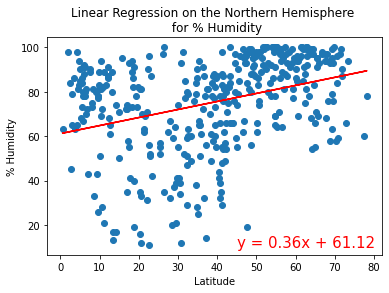

In [160]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity", (45,10))


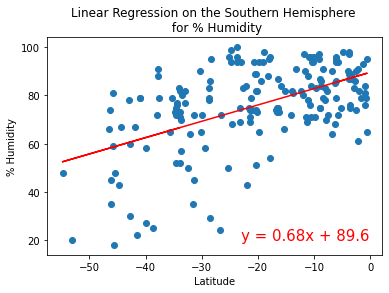

In [163]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity",
                       "% Humidity", (-23, 20))


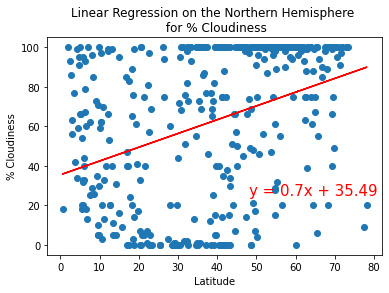

In [167]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Cloudiness",
                       "% Cloudiness", (48,25))


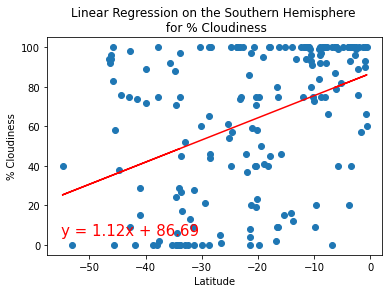

In [178]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Cloudiness",
                       "% Cloudiness", (-55,5))


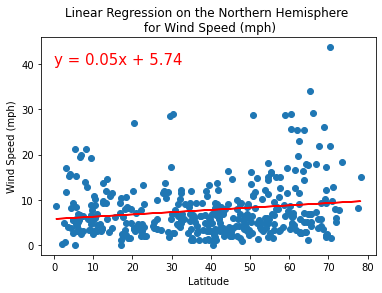

In [173]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Wind Speed (mph)",
                       "Wind Speed (mph)", (0,40))


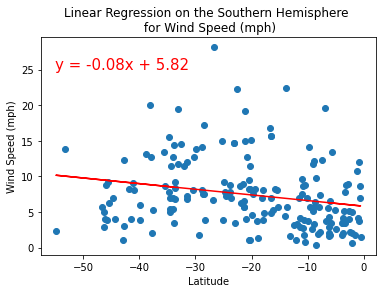

In [176]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values =southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Wind Speed (mph)",
                       "Wind Speed (mph)", (-55,25))
